<a href="https://colab.research.google.com/github/GaikwadSandesh/credit_card_fraud_detection/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualization
%matplotlib inline
import seaborn as sns # visualization

In [138]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma_better/Credit Card Fraud Detection/default of credit card clients.csv' , skiprows=1)

### Data Cleaning and Modification

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.rename(columns = {'PAY_0':'PAY_1', 'default payment next month':'is_default' }, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          30000 non-null  int64
 1   LIMIT_BAL   30000 non-null  int64
 2   SEX         30000 non-null  int64
 3   EDUCATION   30000 non-null  int64
 4   MARRIAGE    30000 non-null  int64
 5   AGE         30000 non-null  int64
 6   PAY_1       30000 non-null  int64
 7   PAY_2       30000 non-null  int64
 8   PAY_3       30000 non-null  int64
 9   PAY_4       30000 non-null  int64
 10  PAY_5       30000 non-null  int64
 11  PAY_6       30000 non-null  int64
 12  BILL_AMT1   30000 non-null  int64
 13  BILL_AMT2   30000 non-null  int64
 14  BILL_AMT3   30000 non-null  int64
 15  BILL_AMT4   30000 non-null  int64
 16  BILL_AMT5   30000 non-null  int64
 17  BILL_AMT6   30000 non-null  int64
 18  PAY_AMT1    30000 non-null  int64
 19  PAY_AMT2    30000 non-null  int64
 20  PAY_AMT3    30000 non-null  

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,is_default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Marrieage has one more value zero and it is categorical variable we can simply drop this

In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

the pattern here is higher the number higher the education we can make 5 and 6 into 4 we can drop the column with 0 education as we have no idea what itis and it is very small data compared to the all data

there is one odd value in pay column which is -2 , it seems it is like -1 and means prepaid or no dues we will keep this values as it is 

# EDA

## Defaults

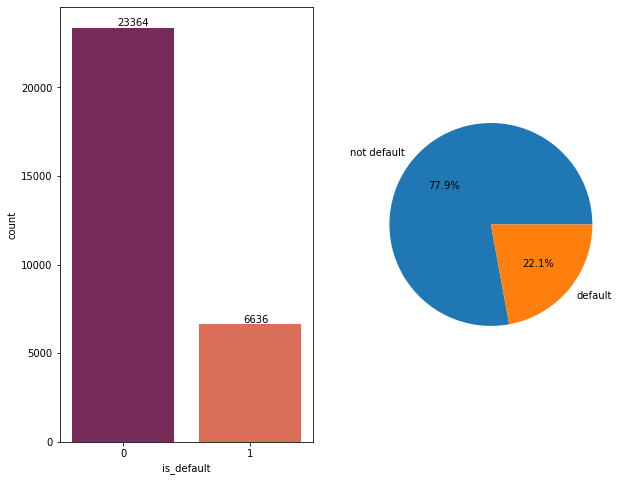

In [ ]:
defaults_df = df['is_default'].va lue_counts()
fig , axis =plt.subplots(1,2, figsize=(10,8))

ax = sns.countplot(x="is_default", data=df, palette="rocket" , ax=axis[0])

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.35, p.get_height()+100))

label = ('not default' , 'default' )
axis[1].pie(defaults_df , labels=label, autopct='%1.1f%%')

plt.show()

### gender

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'is_default'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7f50fb6b4450>,
 [Text(-0.8738874405653198, 0.6680724071702071, 'not default'),
  Text(0.8738873780158632, -0.6680724889894509, 'default')],
 [Text(-0.47666587667199256, 0.3644031311837493, '79.2%'),
  Text(0.47666584255410716, -0.3644031758124277, '20.8%')])

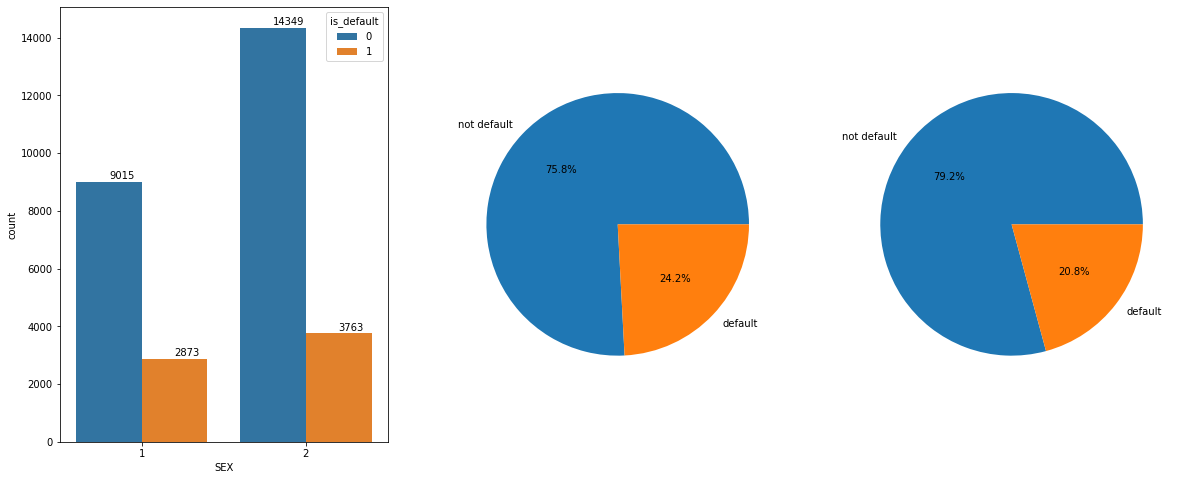

In [ ]:
fig , axis =plt.subplots(1,3, figsize=(20,8))
MALE_df = df.loc[df["SEX" ]== 1]['is_default'].value_counts()
FEMALE_df = df.loc[df["SEX" ]== 2]['is_default'].value_counts()

ax = sns.countplot(x="SEX", data=df , hue='is_default' , ax = axis[0])
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.2, p.get_height()+100))

label = ('not default' , 'default' )
axis[1].pie(MALE_df , labels=label, autopct='%1.1f%%')
axis[2].pie(FEMALE_df , labels=label, autopct='%1.1f%%')

## Education

In [ ]:
df.education

In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
df['is_default'].groupby(df['EDUCATION']).value_counts(normalize = True)

EDUCATION  is_default
1          0             0.807652
           1             0.192348
2          0             0.762651
           1             0.237349
3          0             0.748424
           1             0.251576
4          0             0.929487
           1             0.070513
Name: is_default, dtype: float64

there is pritty much no data for zero only 14 entries and 0 ,5 , 6 is not described in documentation but we can see they have very high not default rate very much similar to 4 , so we will conver 0 , 5 , 6 in to 4

In [ ]:
df.replace({'EDUCATION': {0:4 , 5:4 , 6:4}} , inplace=True )

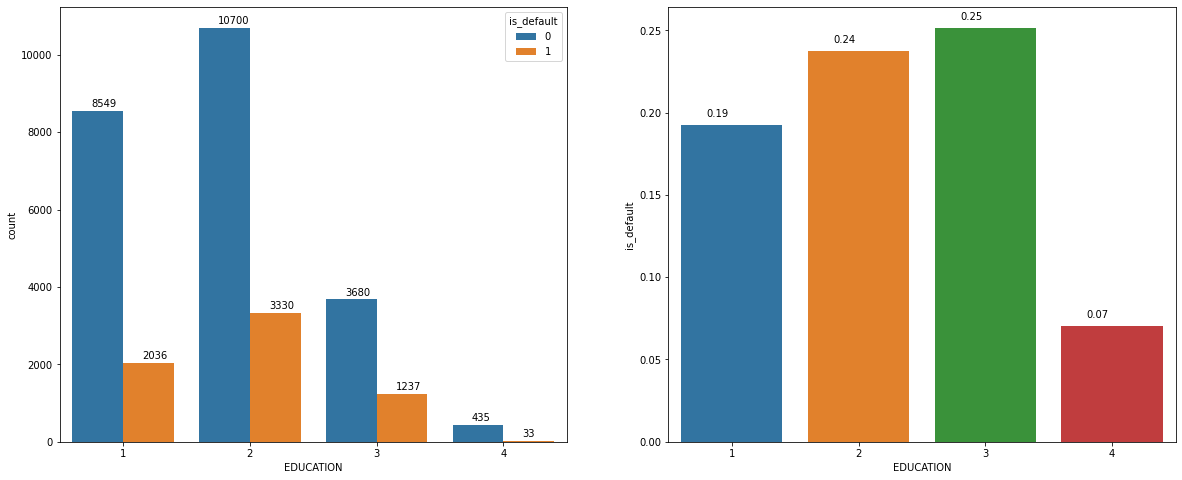

In [ ]:
fig , axis =plt.subplots(1,2, figsize=(20,8))
ax = sns.countplot(x="EDUCATION", data=df , hue='is_default' , ax =axis[0])
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.15, p.get_height()+100))

ax1 = sns.barplot(x = "EDUCATION", y = "is_default", data = df , ci = None , ax= axis[1])
for p in ax1.patches:
    ax1.annotate("%.2f" %(p.get_height()), (p.get_x()+0.20 , p.get_height()+ 0.005))

## marriage

In [ ]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df['is_default'].groupby(df['MARRIAGE']).value_counts(normalize = True)

MARRIAGE  is_default
0         0             0.907407
          1             0.092593
1         0             0.765283
          1             0.234717
2         0             0.790717
          1             0.209283
3         0             0.739938
          1             0.260062
Name: is_default, dtype: float64

We can see that the unknow variable has very less default rate , as the number of unkows values are very less this doesnt come with much of confidance , i will replace this unkwon with single perosn that is median of dataset

In [ ]:
df.replace({'MARRIAGE': {0:2 }} , inplace=True )

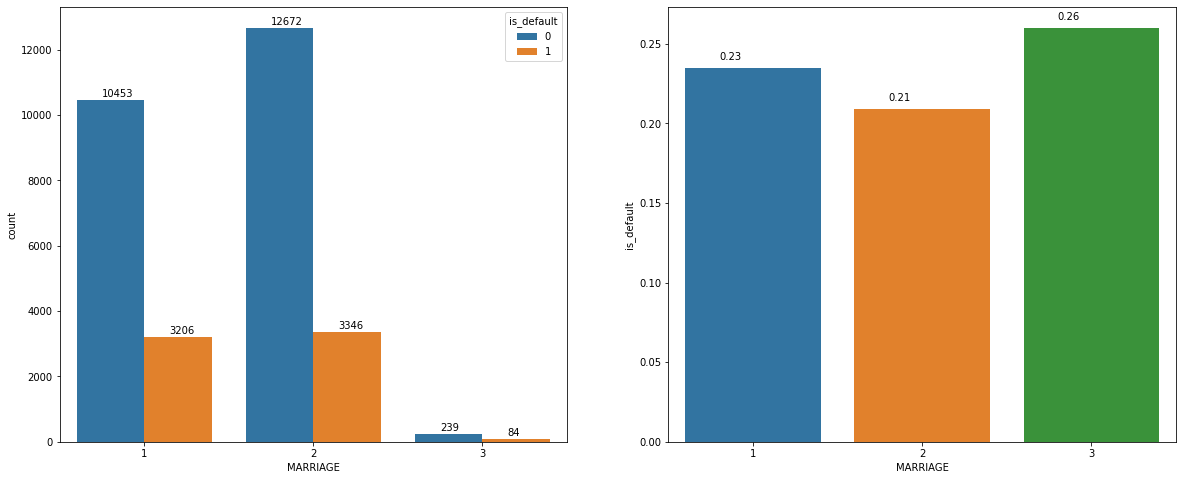

In [ ]:
fig , axis =plt.subplots(1,2, figsize=(20,8))
ax = sns.countplot(x="MARRIAGE", data=df , hue='is_default' , ax =axis[0])
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.15, p.get_height()+100))

ax1 = sns.barplot(x = "MARRIAGE", y = "is_default", data = df , ci = None , ax= axis[1])
for p in ax1.patches:
    ax1.annotate("%.2f" %(p.get_height()), (p.get_x()+0.20 , p.get_height()+ 0.005))

## age

<Figure size 864x288 with 0 Axes>

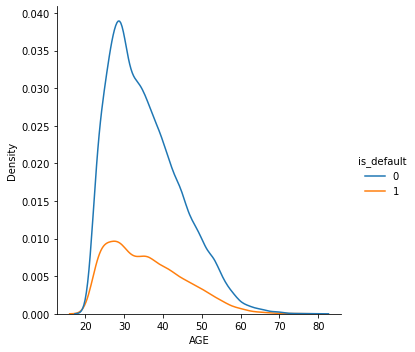

In [ ]:
plt.figure(figsize=(12,4))

sns.displot(data = df , x = 'AGE' , hue = 'is_default' , kind = 'kde' )

not much of information is gained by this we can try groupin age

In [ ]:
df['Age_Group'] = pd.cut(df['AGE'],[0, 25, 30, 35, 40, 50, 60, 100])

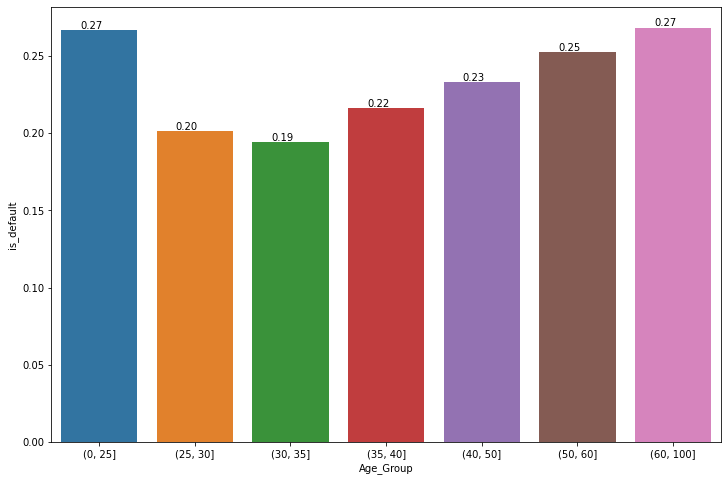

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x = "Age_Group", y = "is_default", data = df, ci = None)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.20, p.get_height()+0.001) )

plt.show()

## credit limit

<Figure size 1296x432 with 0 Axes>

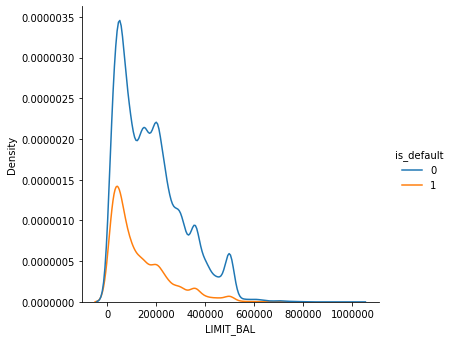

In [102]:
plt.figure(figsize=(18,6))
sns.displot(data = df , x = 'LIMIT_BAL' , hue = 'is_default' , kind = 'kde' )
plt.ticklabel_format(style='plain', axis='x')

In [109]:
df['Credit_Group'] = pd.cut(df['LIMIT_BAL'],[5000, 50000,100000, 200000, 300000, 400000, 600000 , 10000000])
df['Credit_Group'].value_counts()

(100000, 200000]      7880
(5000, 50000]         7676
(200000, 300000]      5059
(50000, 100000]       4822
(300000, 400000]      2759
(400000, 600000]      1725
(600000, 10000000]      79
Name: Credit_Group, dtype: int64

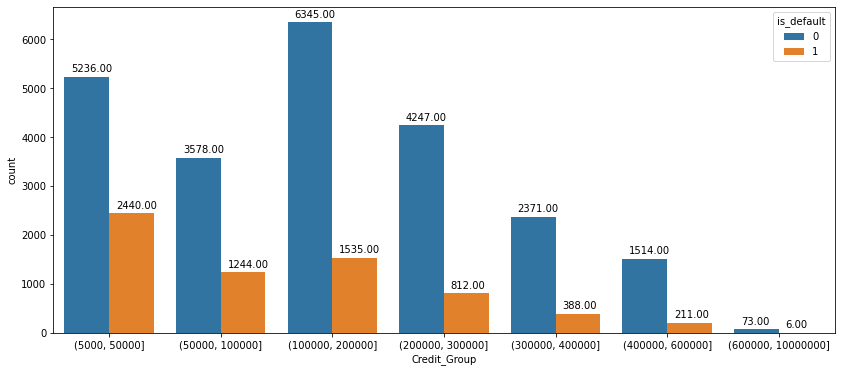

In [124]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x = "Credit_Group", hue=  "is_default", data = df )
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.060, p.get_height()+100) )


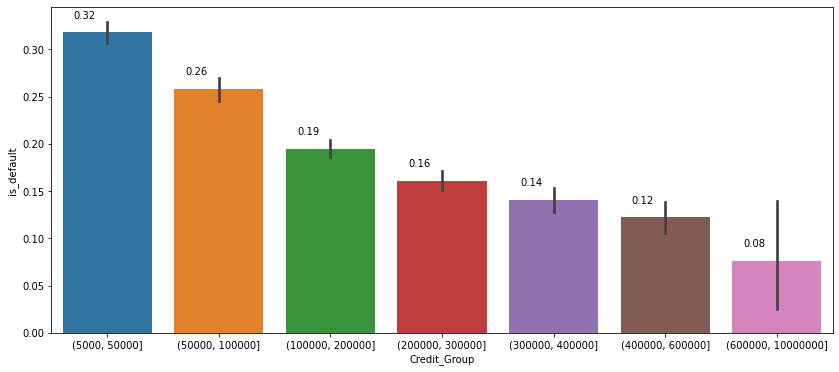

In [136]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x = "Credit_Group", y = "is_default", data = df )
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.10, p.get_height()+0.015) )


### Repayments

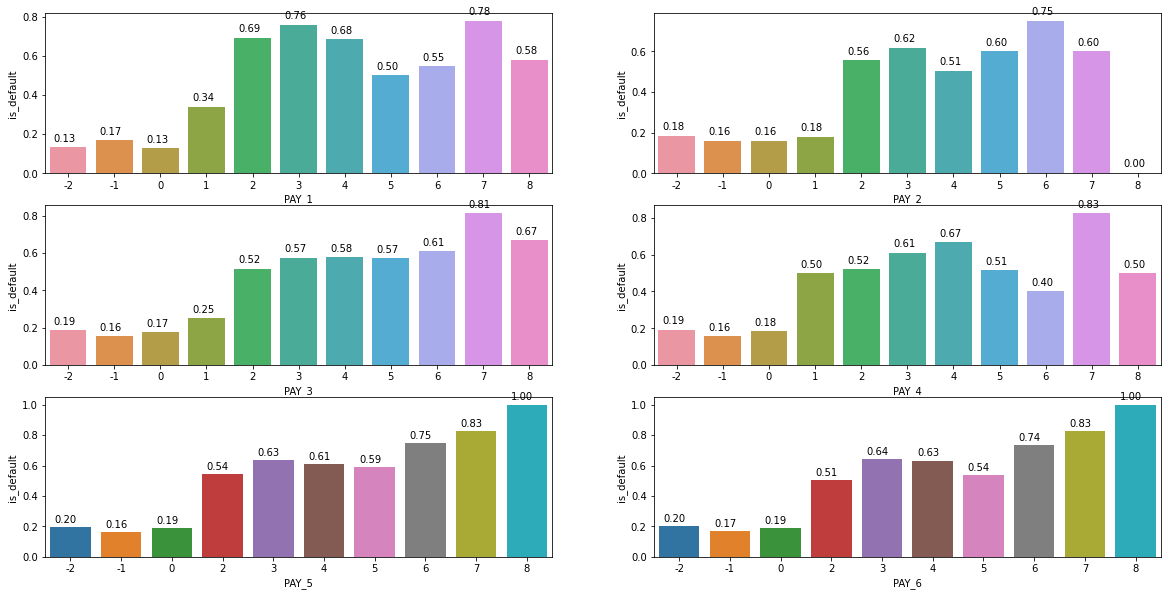

In [152]:
plt.figure(figsize=(20,10))
delay_months = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


for i,col in enumerate(delay_months):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col , y = 'is_default' , data=df , ci = None)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=10)

## Bill Amount

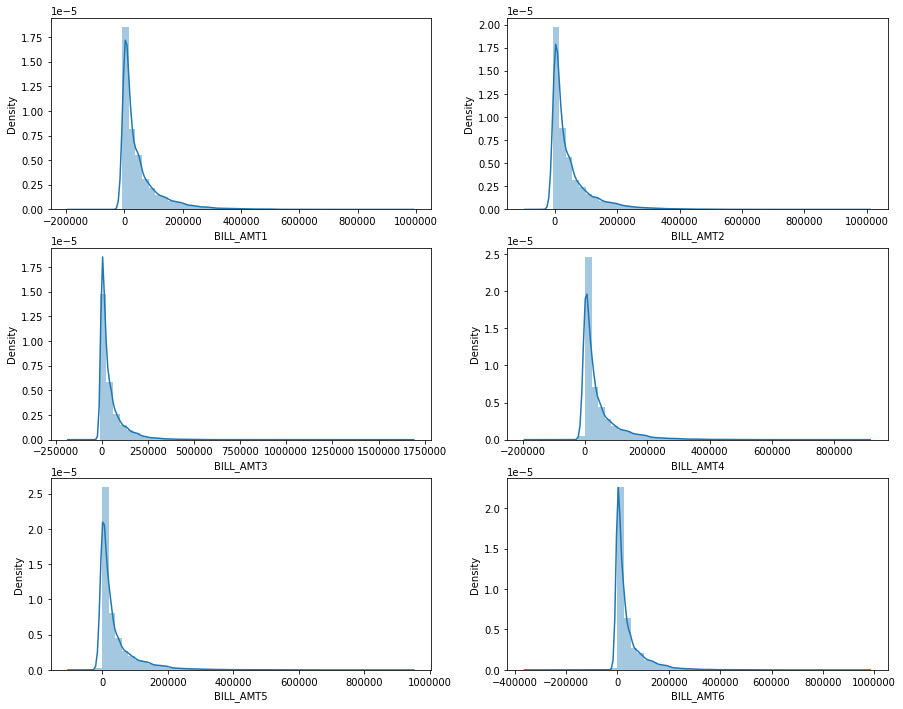

In [156]:
plt.figure(figsize=(15,12))
bill_amount = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

for i,col in enumerate(bill_amount):    
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x')

## Amount of previous payments

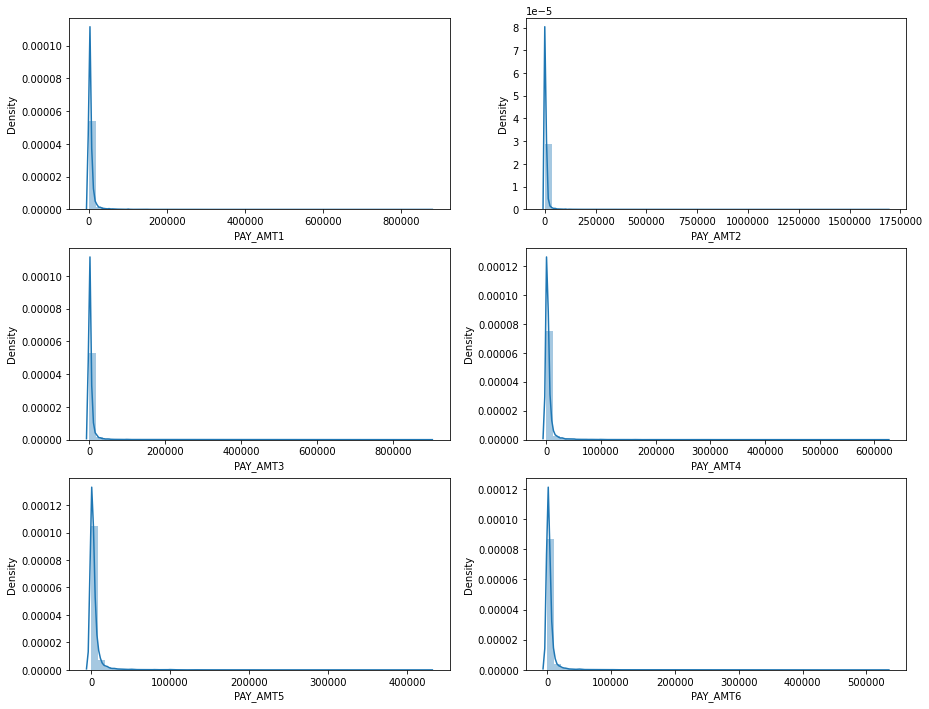

In [157]:
plt.figure(figsize=(15,12))
paid_amount = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for i,col in enumerate(paid_amount):    
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x')
plt.show()